# Import necessary libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define Logistic Regression class

In [16]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Get the number of samples and features
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.iterations):
            # Linear model (z = X · weights + bias)
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Apply sigmoid function
            y_predicted = sigmoid(linear_model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        y_predicted = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_predicted]

# Generate synthetic dataset

In [17]:
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
true_weights = np.array([5, -3])
y = (sigmoid(np.dot(X, true_weights) + 2) > 0.5).astype(int)  # Generate binary labels

# Visualize data

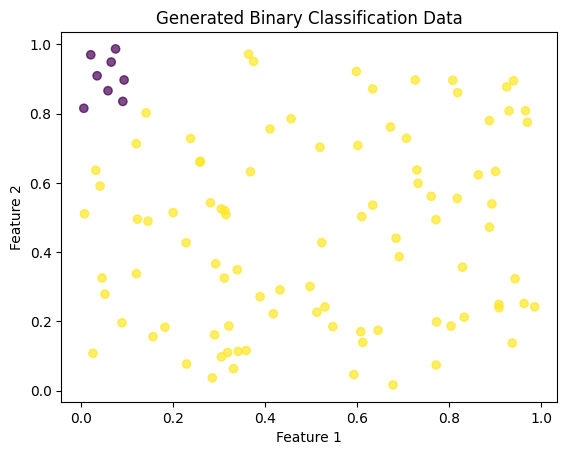

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Generated Binary Classification Data")
plt.show()

# Train the model

In [19]:
log_reg = LogisticRegression(learning_rate=0.1, iterations=1000)
log_reg.fit(X, y)

# Predictions

In [20]:
y_pred = log_reg.predict(X)

# Evaluate

In [21]:
accuracy = np.mean(y == y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.92


# Plot decision boundary

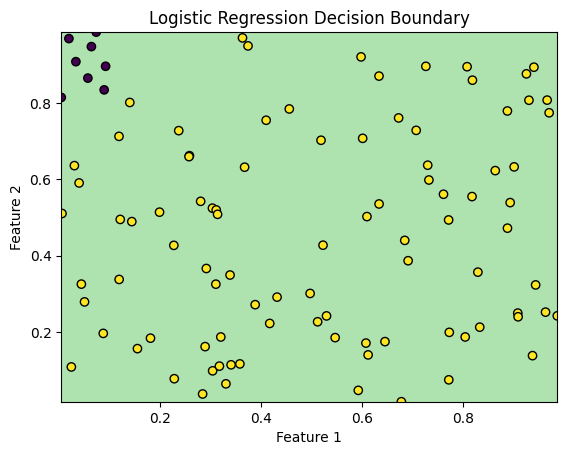

In [22]:
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = np.array(log_reg.predict_proba(grid)).reshape(xx1.shape)

plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], alpha=0.5, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

/tmp/ipykernel_73015/1867463879.py:22: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx1, xx2, probs, levels=[0.5], colors="red", linestyles="--", linewidths=2, label="Decision Boundary")


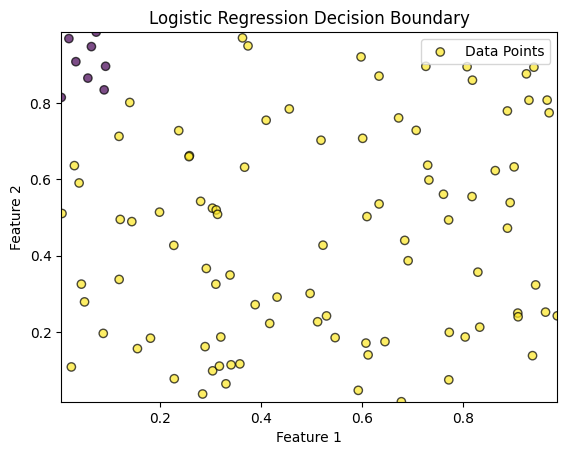

In [23]:
# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(100, 2)  # 100 samples, 2 features
true_weights = np.array([5, -3])
y = (sigmoid(np.dot(X, true_weights) + 2) > 0.5).astype(int)  # Generate binary labels

# Train the model
log_reg = LogisticRegression(learning_rate=0.1, iterations=1000)
log_reg.fit(X, y)

# Plot the data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7, label="Data Points")

# Plot the decision boundary
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = log_reg.predict_proba(grid).reshape(xx1.shape)

# Decision boundary is where probability = 0.5
plt.contour(xx1, xx2, probs, levels=[0.5], colors="red", linestyles="--", linewidths=2, label="Decision Boundary")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.show()
